# Erdos-Renyi model

## TO DO 25-03-2025

Build three connectivity models in a single layer.
Ring network (local neighbors connectivity)
Watts-Strogatz model
Random network
Research and implment how to measure the structure of the networks
Average path length
Average clustering coefficient

In [3]:
pip install smallworld


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


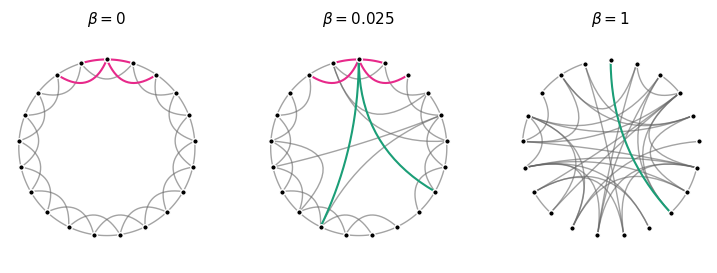

In [5]:
from smallworld.draw import draw_network
from smallworld import get_smallworld_graph

import matplotlib.pyplot as pl

# define network parameters
N = 21
k_over_2 = 2
betas = [0, 0.025, 1.0]
labels = [ r'$\beta=0$', r'$\beta=0.025$', r'$\beta=1$']

focal_node = 0

fig, ax = pl.subplots(1,3,figsize=(9,3))


# scan beta values
for ib, beta in enumerate(betas):

    # generate small-world graphs and draw
    G = get_smallworld_graph(N, k_over_2, beta)
    draw_network(G,k_over_2,focal_node=focal_node,ax=ax[ib])

    ax[ib].set_title(labels[ib],fontsize=11)

# show
pl.subplots_adjust(wspace=0.3)
pl.show()

In [7]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
# Parámetros
N = 20        # Número de nodos
K = 4         # Número de vecinos en el ring (debe ser par)
p_ws = 0.1    # Probabilidad de rewiring para Watts-Strogatz
p_er = K / (N - 1)  # Probabilidad de conexión para red aleatoria (ER)

# 1. Ring Network (red regular)
G_ring = nx.watts_strogatz_graph(N, K, 0.0)  # p=0 es red regular

# 2. Watts-Strogatz Small-World Network
G_ws = nx.watts_strogatz_graph(N, K, p_ws)

# 3. Random Network (Erdős–Rényi)
G_er = nx.erdos_renyi_graph(N, p_er)


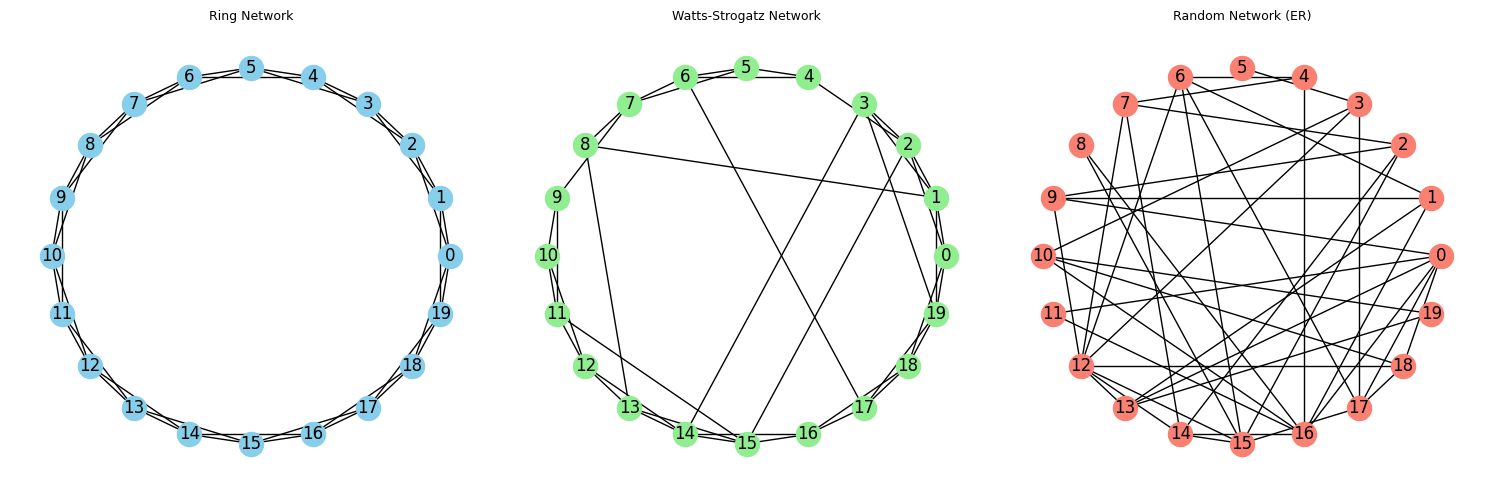

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
pos = nx.circular_layout(G_ring)  # Usamos la misma posición para comparación

# Ring
nx.draw(G_ring, pos=pos, ax=ax[0], node_color='skyblue', with_labels=True)
ax[0].set_title("Ring Network")

# Watts-Strogatz
nx.draw(G_ws, pos=pos, ax=ax[1], node_color='lightgreen', with_labels=True)
ax[1].set_title("Watts-Strogatz Network")

# Erdős–Rényi
nx.draw(G_er, pos=pos, ax=ax[2], node_color='salmon', with_labels=True)
ax[2].set_title("Random Network (ER)")

plt.tight_layout()
plt.show()

In [15]:
def measure_network(G):
    if nx.is_connected(G):
        apl = nx.average_shortest_path_length(G)
    else:
        largest_cc = max(nx.connected_components(G), key=len)
        subgraph = G.subgraph(largest_cc)
        apl = nx.average_shortest_path_length(subgraph)

    acc = nx.average_clustering(G)
    return apl, acc

# Medimos cada red
ring_apl, ring_acc = measure_network(G_ring)
ws_apl, ws_acc     = measure_network(G_ws)
er_apl, er_acc     = measure_network(G_er)

# Mostramos resultados
print("Ring Network")
print(f"  - Average Path Length: {ring_apl:.4f}")
print(f"  - Average Clustering Coefficient: {ring_acc:.4f}\n")

print("Watts-Strogatz")
print(f"  - Average Path Length: {ws_apl:.4f}")
print(f"  - Average Clustering Coefficient: {ws_acc:.4f}\n")

print("Erdős–Rényi")
print(f"  - Average Path Length: {er_apl:.4f}")
print(f"  - Average Clustering Coefficient: {er_acc:.4f}")

🔷 Ring Network
  - Average Path Length: 2.8947
  - Average Clustering Coefficient: 0.5000

🟢 Watts-Strogatz
  - Average Path Length: 2.3105
  - Average Clustering Coefficient: 0.3500

🔴 Erdős–Rényi
  - Average Path Length: 2.0895
  - Average Clustering Coefficient: 0.1594


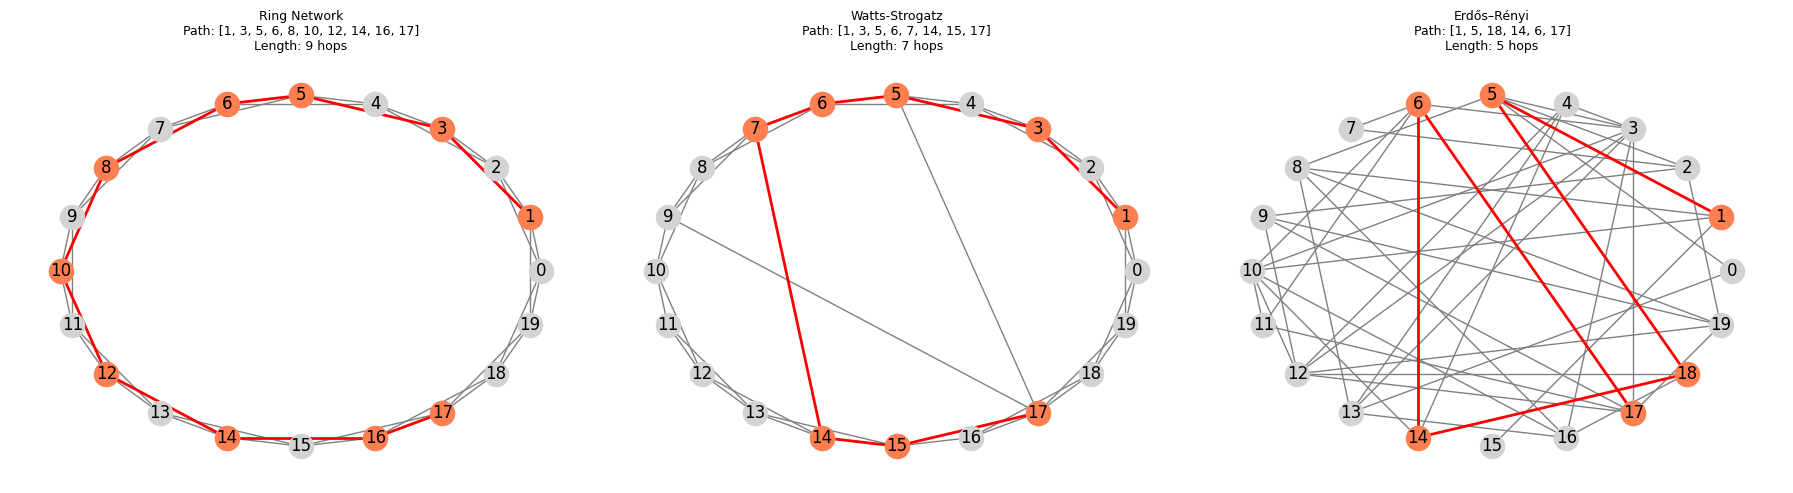

In [31]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Crear redes
N = 20
K = 4
p_ws = 0.1
p_er = K / (N - 1)

G_ring = nx.watts_strogatz_graph(N, K, 0.0)
G_ws   = nx.watts_strogatz_graph(N, K, p_ws)
G_er   = nx.erdos_renyi_graph(N, p_er)

# Ruta aleatoria
path_nodes = [1, 5, 14, 17]

def get_full_path(G, path_nodes):
    full_path = []
    for i in range(len(path_nodes) - 1):
        start, end = path_nodes[i], path_nodes[i+1]
        try:
            subpath = nx.shortest_path(G, source=start, target=end)
            full_path += subpath[:-1]  # evitar duplicados
        except nx.NetworkXNoPath:
            print(f"No path between {start} and {end}")
    full_path.append(path_nodes[-1])
    return full_path

def draw_graph_with_path(G, full_path, ax, title):
    pos = nx.circular_layout(G)
    nx.draw(G, pos, ax=ax, node_color='lightgray', with_labels=True, edge_color='gray')
    
    # Ruta como pares de aristas
    path_edges = list(zip(full_path[:-1], full_path[1:]))
    
    # Dibujar el camino
    nx.draw_networkx_nodes(G, pos, nodelist=full_path, node_color='coral', ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2, ax=ax)
    
    ax.set_title(title)

# Preparar visualización
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Dibujar para cada red
for G, name, axis in zip([G_ring, G_ws, G_er],
                         ["Ring Network", "Watts-Strogatz", "Erdős–Rényi"],
                         ax):
    full_path = get_full_path(G, path_nodes)
    draw_graph_with_path(G, full_path, axis, f"{name}\nPath: {full_path}\nLength: {len(full_path)-1} hops")

plt.tight_layout()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8e08c563-cd9e-485d-8d37-cd34ae63a596' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>